In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import sklearn
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Loading Data

## Hourly Data

### Standardized Data incl 0 output

In [ ]:
train_stdf0 = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/train_stdf.csv')
pd.set_option('display.max_columns',None)
train_stdf0.head()

,Year,Month,Day,Hour,GHI,TmpF,output,dew,humidity,precip,snow,sealevelpressure,cloudcover,visibility,solarradiation,date,Clear,"Freezing Drizzle/Freezing Rain, Overcast","Ice, Overcast",Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy","Snow, Overcast","Snow, Partially cloudy","Snow, Rain, Overcast","Snow, Rain, Partially cloudy"
0,2016,10,1,0,0.000000,56.997313,0.0,53.3,87.78,0.025,0.0,1016.3,72.8,6.6,0.0,2016-10-01,0,0,0,0,0,0,0,1,0,0,0,0
1,2016,10,1,1,0.000000,56.929524,0.0,53.3,91.47,0.005,0.0,1016.4,94.8,7.0,0.0,2016-10-01,0,0,0,0,0,0,1,0,0,0,0,0
2,2016,10,1,2,0.001702,57.055018,0.0,54.0,93.96,0.000,0.0,1016.5,100.0,4.0,0.0,2016-10-01,0,0,0,1,0,0,0,0,0,0,0,0
3,2016,10,1,3,0.065986,57.198007,1.0,54.0,92.12,0.021,0.0,1016.5,97.7,4.2,0.0,2016-10-01,0,0,0,0,0,0,1,0,0,0,0,0
4,2016,10,1,4,0.163879,57.340995,0.0,54.1,93.36,0.000,0.0,1016.3,97.7,4.4,0.0,2016-10-01,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
val_stdf0 = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/val_stdf.csv')
val_stdf0.head()

,Year,Month,Day,Hour,GHI,TmpF,output,dew,humidity,precip,snow,sealevelpressure,cloudcover,visibility,solarradiation,date,Clear,"Freezing Drizzle/Freezing Rain, Overcast","Ice, Overcast",Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy","Snow, Overcast","Snow, Partially cloudy","Snow, Rain, Overcast","Snow, Rain, Partially cloudy"
0,2021,1,1,1,-0.671651,-1.075944,0.0,-0.948791,0.783101,-0.176310,-0.067377,1.013285,1.439519,0.203195,-0.644881,2021-01-01,0,0,0,1,0,0,0,0,0,0,0,0
1,2021,1,1,2,-0.671352,-1.063800,0.0,-0.948791,0.783101,-0.176310,-0.067377,0.847454,1.439519,0.203195,-0.644881,2021-01-01,0,0,0,1,0,0,0,0,0,0,0,0
2,2021,1,1,3,-0.671054,-1.051656,0.0,-0.921496,0.781982,-0.176310,-0.067377,0.757000,1.439519,0.266835,-0.644881,2021-01-01,0,0,0,1,0,0,0,0,0,0,0,0
3,2021,1,1,4,-0.670826,-1.039512,0.0,-0.899660,0.860870,-0.176310,-0.067377,0.696698,1.439519,0.012274,-0.644881,2021-01-01,0,0,0,1,0,0,0,0,0,0,0,0
4,2021,1,1,5,-0.670678,-1.027369,0.0,-0.845071,1.112640,0.128314,-0.067377,0.576093,1.439519,-3.106094,-0.644881,2021-01-01,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
test_stdf0 = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/test_stdf.csv')
test_stdf0.head()
test_stdf0_copy=test_stdf0.copy()

In [ ]:
# remove 'date' column that has the full date
'''
train_stdf.drop(columns='date', inplace=True)
val_stdf.drop(columns='date', inplace=True)
test_stdf.drop(columns='date', inplace=True)
'''
print('Train Dataset (0 output included):',train_stdf0.shape)
print('Validation Dataset (0 output included):',val_stdf0.shape)
print('Test Dataset (0 output included):',test_stdf0.shape)

Train Dataset (0 output included): (37273, 28)
Validation Dataset (0 output included): (5831, 28)
Test Dataset (0 output included): (10224, 28)


### Standardized Data NO 0 output

In [ ]:
train_stdf = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/train_df_no0_scaled.csv')
pd.set_option('display.max_columns',None)
train_stdf.head()

,Year,Month,Day,Hour,GHI,TmpF,output,dew,humidity,precip,snow,sealevelpressure,cloudcover,visibility,solarradiation,date
0,2016,10,1,3,-1.143079,-0.272506,1.0,0.325886,1.492652,0.514650,-0.045143,-0.208282,1.403860,-3.059949,-1.046464,2016-10-01
1,2016,10,1,7,-1.064765,-0.240862,208.0,0.331360,1.382033,-0.176102,-0.045143,-0.223053,1.469317,-1.842624,-1.045319,2016-10-01
2,2016,10,1,8,-1.076574,-0.217895,193.0,0.380626,1.423381,-0.176102,-0.045143,-0.163969,1.469317,-2.451286,-0.901080,2016-10-01
3,2016,10,1,9,-0.855667,-0.185494,971.0,0.391574,1.392235,-0.176102,-0.045143,-0.090114,1.469317,-3.181681,-0.640839,2016-10-01
4,2016,10,1,10,-0.614201,-0.140744,1847.0,0.424419,1.339074,-0.176102,-0.045143,-0.075343,1.469317,-2.573019,-0.622523,2016-10-01


In [ ]:
val_stdf = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/val_df_no0_scaled.csv')
val_stdf.head()

,Year,Month,Day,Hour,GHI,TmpF,output,dew,humidity,precip,snow,sealevelpressure,cloudcover,visibility,solarradiation,date
0,2021,1,1,8,-1.163743,-1.259442,40.0,-0.851896,1.449028,3.574936,-0.089366,-0.191191,1.319176,-4.216903,-0.975485,2021-01-01
1,2021,1,1,9,-1.131649,-1.245206,136.0,-0.793012,1.476743,8.968551,-0.089366,-0.270879,1.319176,-4.347018,-0.971708,2021-01-01
2,2021,1,1,10,-1.068456,-1.140899,344.0,-0.760893,1.498481,3.496388,-0.089366,-0.478069,1.319176,-1.159217,-0.945269,2021-01-01
3,2021,1,1,11,-0.651713,-0.994364,1792.0,-0.669890,1.445767,0.799581,-0.089366,-0.621507,1.319176,-0.248417,-0.949046,2021-01-01
4,2021,1,1,12,-0.272570,-0.744468,3496.0,-0.573534,1.371860,1.349415,-0.089366,-0.828697,1.319176,-1.094160,-0.949046,2021-01-01


In [ ]:
test_stdf = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/test_df_no0_scaled.csv')
test_stdf_copy=test_stdf.copy()
test_stdf.head()

,Year,Month,Day,Hour,GHI,TmpF,output,dew,humidity,precip,snow,sealevelpressure,cloudcover,visibility,solarradiation,date
0,2021,9,1,6,-1.194333,-0.419343,72.0,1.058545,1.330608,-0.181593,-0.055333,-2.068258,1.435568,0.310643,-1.102007,2021-09-01
1,2021,9,1,7,-1.190244,-0.418918,520.0,1.047124,1.336330,-0.181593,-0.055333,-1.968490,0.912040,0.310643,-1.013486,2021-09-01
2,2021,9,1,8,-1.186154,-0.418493,472.0,1.058545,1.330608,-0.181593,-0.055333,-1.785583,1.435568,0.310643,-1.064983,2021-09-01
3,2021,9,1,9,-1.182064,-0.418068,3120.0,0.892945,0.953472,-0.181593,-0.055333,-1.635931,0.693903,0.310643,-0.482694,2021-09-01
4,2021,9,1,10,-1.177974,-0.417643,5432.0,0.870104,0.552407,-0.181593,-0.055333,-1.569419,-0.017768,0.310643,0.069302,2021-09-01


In [ ]:
# remove 'date' column that has the full date
'''
train_stdf.drop(columns='date', inplace=True)
val_stdf.drop(columns='date', inplace=True)
test_stdf.drop(columns='date', inplace=True)
'''
print('Train Dataset:',train_stdf.shape)
print('Validation Dataset:',val_stdf.shape)
print('Test Dataset:',test_stdf.shape)

Train Dataset: (19441, 16)
Validation Dataset: (3145, 16)
Test Dataset: (5275, 16)


## Daily Data

### Standardized Data

In [ ]:
train_daily = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/train_daily_scaled.csv')
pd.set_option('display.max_columns',None)
train_daily.head()

,date,GHI,TmpF,dew,humidity,snow,sealevelpressure,cloudcover,visibility,solarradiation,precip,output,year,month,day
0,2016-10-01,-0.911144,0.189517,0.543633,1.533085,-0.133726,-0.190797,1.580204,-2.268354,-0.134032,-0.232540,23159.0,2016,10,1
1,2016-10-02,-0.547337,0.438511,0.685913,0.824246,-0.133726,-0.026193,1.760792,-0.181476,0.625929,-0.391188,34483.0,2016,10,2
2,2016-10-03,0.014224,0.493965,0.508993,0.368191,-0.133726,-0.002955,-0.338909,-1.218789,0.533475,-0.420033,52849.0,2016,10,3
3,2016-10-04,0.177402,0.706897,0.582691,-0.148064,-0.133726,-0.122373,-0.176146,0.533208,0.762740,-0.420033,59870.0,2016,10,4
4,2016-10-05,0.246676,0.796062,0.703815,-0.402916,-0.133726,0.075797,0.090207,0.659810,0.705958,-0.420033,62184.0,2016,10,5


In [ ]:
val_daily = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/val_daily_scaled.csv')
val_daily.head()

,date,GHI,TmpF,dew,humidity,snow,sealevelpressure,cloudcover,visibility,solarradiation,precip,output,year,month,day
0,2021-01-01,-1.182504,-0.516409,-0.380634,1.479329,-0.277355,-0.714546,1.380353,-0.837841,-1.320717,2.452647,18304.0,2021,1,1
1,2021-01-02,-1.536263,-0.879409,-0.624515,0.992856,-0.277355,-0.238342,1.639755,0.351472,-1.560318,-0.393412,6768.0,2021,1,2
2,2021-01-03,-1.527355,-1.072660,-0.703015,1.314918,-0.277355,-0.225773,1.549299,-0.605780,-1.599753,-0.302155,7040.0,2021,1,3
3,2021-01-04,-0.633485,-1.066637,-0.845242,1.061382,-0.277355,-0.168517,-1.042435,-1.281244,-0.895374,-0.393412,44128.0,2021,1,4
4,2021-01-05,-1.642114,-1.153356,-0.841053,1.029431,-0.277355,0.139410,1.669669,-0.062923,-1.626708,-0.356339,4408.0,2021,1,5


In [ ]:
test_daily = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/test_daily_scaled.csv')
test_daily_copy=test_daily.copy()
test_daily.head()

,date,GHI,TmpF,dew,humidity,snow,sealevelpressure,cloudcover,visibility,solarradiation,precip,output,year,month,day
0,2021-09-01,-1.448266,-0.191226,0.975436,0.462527,-0.153603,-1.642958,0.365514,0.049029,0.720474,0.077540,53000.0,2021,9,1
1,2021-09-02,-1.213210,-0.180115,0.480832,-0.429740,-0.153603,-0.091687,-1.231375,0.525784,1.020867,-0.415268,78088.0,2021,9,2
2,2021-09-03,-0.978154,-0.169005,0.493484,-0.445952,-0.153603,0.133569,-0.628653,0.525784,0.859967,-0.415268,72408.0,2021,9,3
3,2021-09-04,-0.743098,-0.157894,0.841998,0.291878,-0.153603,-0.427018,-0.332383,0.499000,0.094554,-0.394445,54136.0,2021,9,4
4,2021-09-05,-0.508043,-0.146784,1.084526,1.304403,-0.153603,-0.956258,1.280062,-2.222250,-0.666541,3.284258,16200.0,2021,9,5


In [ ]:
# remove 'date' column that has the full date
'''
train_stdf.drop(columns='date', inplace=True)
val_stdf.drop(columns='date', inplace=True)
test_stdf.drop(columns='date', inplace=True)
'''
print('Daily Train Dataset:',train_daily.shape)
print('Daily Validation Dataset:',val_daily.shape)
print('Daily Test Dataset:',test_daily.shape)

Daily Train Dataset: (1553, 15)
Daily Validation Dataset: (243, 15)
Daily Test Dataset: (426, 15)


In [ ]:
train_daily.columns

Index(['date', 'GHI', 'TmpF', 'dew', 'humidity', 'snow', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'precip', 'output',
       'year', 'month', 'day'],
      dtype='object')

In [ ]:
train_stdf.columns

Index(['Year', 'Month', 'Day', 'Hour', 'GHI', 'TmpF', 'output', 'dew',
       'humidity', 'precip', 'snow', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'date'],
      dtype='object')

# Diving the Sets

## Standardized data

### Hourly - 0 incl

In [ ]:
xst_train0 = train_stdf0.drop(columns=['output', 'date'])
y_train0 = train_stdf0['output']
xst_val0 = val_stdf0.drop(columns=['output', 'date'])
y_val0 = val_stdf0['output']
xst_test0 = test_stdf0.drop(columns=['output', 'date'])
y_test0 = test_stdf0['output']

print('Hourly (0 incl) Train Dataset:',xst_train0.shape, y_train0.shape)
print('Hourly (0 incl) Validation Dataset:',xst_val0.shape, y_val0.shape)
print('Hourly (0 incl) Test Dataset:',xst_test0.shape, y_test0.shape)

Hourly (0 incl) Train Dataset: (37273, 26) (37273,)
Hourly (0 incl) Validation Dataset: (5831, 26) (5831,)
Hourly (0 incl) Test Dataset: (10224, 26) (10224,)


### Hourly - 0 removed

In [ ]:
xst_train = train_stdf.drop(columns=['output', 'date'])
y_train = train_stdf['output']
xst_val = val_stdf.drop(columns=['output', 'date'])
y_val = val_stdf['output']
xst_test = test_stdf.drop(columns=['output', 'date'])
y_test = test_stdf['output']

print('Train Dataset:',xst_train.shape, y_train.shape)
print('Validation Dataset:',xst_val.shape, y_val.shape)
print('Test Dataset:',xst_test.shape, y_test.shape)

Train Dataset: (19441, 14) (19441,)
Validation Dataset: (3145, 14) (3145,)
Test Dataset: (5275, 14) (5275,)


### Daily

In [ ]:
xst_train_daily = train_daily.drop(columns=['output', 'date'])
y_train_daily = train_daily['output']
xst_val_daily = val_daily.drop(columns=['output', 'date'])
y_val_daily = val_daily['output']
xst_test_daily = test_daily.drop(columns=['output', 'date'])
y_test_daily = test_daily['output']

print('Daily Train Dataset:',xst_train_daily.shape, y_train_daily.shape)
print('Daily Validation Dataset:',xst_val_daily.shape, y_val_daily.shape)
print('Daily Test Dataset:',xst_test_daily.shape, y_test_daily.shape)

Daily Train Dataset: (1553, 13) (1553,)
Daily Validation Dataset: (243, 13) (243,)
Daily Test Dataset: (426, 13) (426,)


# Build Model

## XGBoost Regressor

In [ ]:
# From 'Optimized Random Forest for Solar Radiation Prediction Using Sunshine Hours', from Villegas-Mier
# Results obtained after determining the best features for the RF algorithm.
# n_estimators=500, max_features=4, min_samples_leaf=2, random_state=42
params = { 'n_estimators':500, 
          'max_features':4, 
          'min_samples_leaf':2, 
          'random_state':42,
          #'num_leaves': 30,
          #'n_estimators': 500,
          #'max_depth': 8,
          #'min_child_samples': 200,
          'learning_rate': 0.1,
          #'subsample': 0.50,
          #'colsample_bytree': 0.75
         }

xgb_model = xgb.XGBRegressor(**params)

In [ ]:
# From 'Optimized Random Forest for Solar Radiation Prediction Using Sunshine Hours', from Villegas-Mier
# Results obtained after determining the best features for the RF algorithm.
# n_estimators: 500, max_features: 4, min_samples_leaf: 2 ,maximum_depth

# Instantiate model with 500 decision trees
# rf_500 = RandomForestRegressor(n_estimators=500, max_features=4, min_samples_leaf=2, random_state=42)

In [ ]:
def plot_predictions(test_df, y_test, valid_preds):
    
    rmse = sklearn.metrics.mean_squared_error(y_test, valid_preds, squared=False)
    
    nrows, ncols = 1, 1
    fig, ax = plt.subplots(nrows, ncols, figsize=(20,4))

    ax1 = plt.subplot(nrows, ncols, 1)
    ax1.plot(test_df['date'].values, y_test, c='tab:purple')
    ax1.scatter(test_df['date'].values, valid_preds, s=5, c='#7FB285')
    ax1.set_ylabel('Solar Power Generation')
    ax1.set_xlabel('Date')
    ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax1.set_title('Prediction RMSE: {:.4f}'.format(rmse), fontsize=10)

    plt.tight_layout()
    plt.show()

In [ ]:
def GetDailyOutput(test_data,predictionData):
  """
  The function takes hourly test data and hourly predictions
  and retruns daily test data and daily predictions
  """
  y_test_daily =test_data.groupby(['Year','Month','Day']).agg({'output': 'sum'})
  test_data_v1 = test_data.copy()
  test_data_v1['prediction'] = predictionData

  y_pred_daily =  test_data_v1.groupby(['Year','Month','Day']).agg({'prediction': 'sum'})

  return y_test_daily,y_pred_daily

In [ ]:
def GetMonthlyOutput(test_data,predictionData):
  """
  The function takes hourly test data and hourly predictions
  and retruns monthly test data and monthly predictions
  """
  df = test_data[['output','date']]
  df['prediction'] = predictionData
  # Convert the date column to a datetime format
  df['date'] = pd.to_datetime(df['date'])

  # Set the date column as the index column
  df.set_index('date', inplace=True)

  # Resample to weekly intervals
  monthly_df = df.resample('M').mean()

  return monthly_df

In [ ]:
def GetWeeklyOutput(test_data,predictionData):
  """
  The function takes hourly test data and hourly predictions
  and retruns weekly test data and weekly predictions
  """
  df = test_data[['output','date']]
  df['prediction'] = predictionData
  # Convert the date column to a datetime format
  df['date'] = pd.to_datetime(df['date'])

  # Set the date column as the index column
  df.set_index('date', inplace=True)

  # Resample to weekly intervals
  weekly_df = df.resample('W').mean()

  return weekly_df

### Standardized Data

#### Hourly 0 incl all col

In [ ]:
# Train the model on training data
xgb_model.fit(xst_train0, y_train0)

[23:18:21] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_features=4,
             max_leaves=None, min_child_weight=None, min_samples_leaf=2,
             missing=nan, monotone_constraints=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Predict
yst0_pred_500 = xgb_model.predict(xst_test0)

In [ ]:
test_data = xst_test0.iloc[40:41]
from time import process_time
t1_start = process_time() 
test_prediction = xgb_model.predict(test_data)
t1_stop = process_time()

print("Elapsed time:", t1_stop, t1_start) 
   
print("Elapsed time during the whole program in seconds:",
                                         t1_stop-t1_start) 

Elapsed time: 169.311485477 169.307391382
Elapsed time during the whole program in seconds: 0.004094094999999243


In [ ]:
# Evaluate

In [ ]:
mae_500_st = mean_absolute_error(y_test0, yst0_pred_500)
print('Mean Absolute Error (MAE):', round(mae_500_st, 2))
# The model is the most accurate when its MAE is closer to 0.

Mean Absolute Error (MAE): 309.87


In [ ]:
# accuracy
mape_500_st0 = mean_absolute_percentage_error(y_test0, yst0_pred_500)
print('Mean Absolute Percentage Error (MAPE):', round(mape_500_st0, 2))
# A MAPE score of less than 5% indicated that the model has great predictive power.
# In Scikit Learn Library
# Note here that the output is not a percentage in the range [0, 100] and a value
# of 100 does not mean 100% but 1e2. Furthermore, the output can be arbitrarily
# high when y_true is small (which is specific to the metric) or when
# abs(y_true - y_pred) is large (which is common for most regression metrics)

Mean Absolute Percentage Error (MAPE): 3.381528103270326e+17


In [ ]:
rmse_500_st0 = mean_squared_error(y_test0, yst0_pred_500, squared=False)
print('Root Mean Squared Error (RMSE):', round(rmse_500_st0, 2))

Root Mean Squared Error (RMSE): 956.53


In [ ]:
r2_500_st0 = r2_score(y_test0, yst0_pred_500)
print('R^2:', round(r2_500_st0, 2))
# The closer R^2 is to 1, the better the model fits to the data and the more accurate it is.

R^2: 0.9


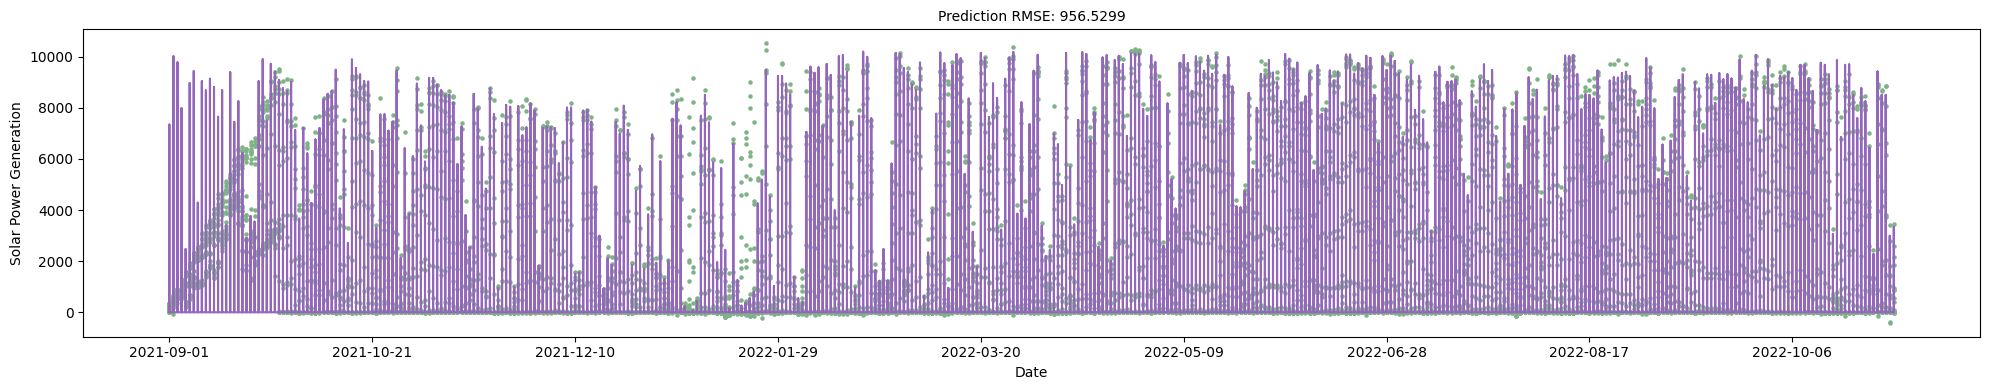

In [ ]:
# plot
plot_predictions(test_stdf0, y_test0, xgb_model.predict(xst_test0))

#### Hourly 0 incl, NOT all col

In [ ]:
xst_train0.drop(columns=['Clear', 'Freezing Drizzle/Freezing Rain, Overcast',
              'Ice, Overcast', 'Overcast', 'Partially cloudy', 'Rain', 'Rain, Overcast',
              'Rain, Partially cloudy', 'Snow, Overcast', 'Snow, Partially cloudy',
              'Snow, Rain, Overcast','Snow, Rain, Partially cloudy'], inplace=True)
xst_val0.drop(columns=['Clear', 'Freezing Drizzle/Freezing Rain, Overcast',
              'Ice, Overcast', 'Overcast', 'Partially cloudy', 'Rain', 'Rain, Overcast',
              'Rain, Partially cloudy', 'Snow, Overcast', 'Snow, Partially cloudy',
              'Snow, Rain, Overcast','Snow, Rain, Partially cloudy'], inplace=True)
xst_test0.drop(columns=['Clear', 'Freezing Drizzle/Freezing Rain, Overcast',
              'Ice, Overcast', 'Overcast', 'Partially cloudy', 'Rain', 'Rain, Overcast',
              'Rain, Partially cloudy', 'Snow, Overcast', 'Snow, Partially cloudy',
              'Snow, Rain, Overcast','Snow, Rain, Partially cloudy'], inplace=True)

In [ ]:
print('Train Dataset:',xst_train0.shape, y_train0.shape)
print('Validation Dataset:',xst_val0.shape, y_val0.shape)
print('Test Dataset:',xst_test0.shape, y_test0.shape)

Train Dataset: (37273, 14) (37273,)
Validation Dataset: (5831, 14) (5831,)
Test Dataset: (10224, 14) (10224,)


In [ ]:
# Train the model on training data
xgb_model.fit(xst_train0, y_train0)

[23:12:17] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf" } are not used.



KeyboardInterrupt: ignored

In [ ]:
# Predict
yst0_pred_500 = xgb_model.predict(xst_test0)

In [ ]:
# Evaluate

In [ ]:
mae_500_st = mean_absolute_error(y_test0, yst0_pred_500)
print('Mean Absolute Error (MAE):', round(mae_500_st, 2))
# The model is the most accurate when its MAE is closer to 0.

In [ ]:
# accuracy
mape_500_st0 = mean_absolute_percentage_error(y_test0, yst0_pred_500)
print('Mean Absolute Percentage Error (MAPE):', round(mape_500_st0, 2))
# A MAPE score of less than 5% indicated that the model has great predictive power.
# In Scikit Learn Library
# Note here that the output is not a percentage in the range [0, 100] and a value
# of 100 does not mean 100% but 1e2. Furthermore, the output can be arbitrarily
# high when y_true is small (which is specific to the metric) or when
# abs(y_true - y_pred) is large (which is common for most regression metrics)

In [ ]:
rmse_500_st0 = mean_squared_error(y_test0, yst0_pred_500, squared=False)
print('Root Mean Squared Error (RMSE):', round(rmse_500_st0, 2))

In [ ]:
r2_500_st0 = r2_score(y_test0, yst0_pred_500)
print('R^2:', round(r2_500_st0, 2))
# The closer R^2 is to 1, the better the model fits to the data and the more accurate it is.

In [ ]:
weekly_df = GetWeeklyOutput(test_stdf0_copy,yst0_pred_500)
monthly_df = GetMonthlyOutput(test_stdf0_copy,yst0_pred_500)

In [ ]:
weekly_df

In [ ]:
monthly_df

In [ ]:
# plot
plot_predictions(test_stdf0, y_test0, xgb_model.predict(xst_test0))

#### Hourly NO 0

In [ ]:
# Train the model on training data
xgb_model.fit(xst_train, y_train)

In [ ]:
# Predict
yst_pred_500 = xgb_model.predict(xst_test)

In [ ]:
# Evaluate

In [ ]:
mae_500_st = mean_absolute_error(y_test, yst_pred_500)
print('Mean Absolute Error (MAE):', round(mae_500_st, 2))
# The model is the most accurate when its MAE is closer to 0.

In [ ]:
# accuracy
mape_500_st = mean_absolute_percentage_error(y_test, yst_pred_500)
print('Mean Absolute Percentage Error (MAPE):', round(mape_500_st, 2))
# A MAPE score of less than 5% indicated that the model has great predictive power.
# In Scikit Learn Library
# Note here that the output is not a percentage in the range [0, 100] and a value
# of 100 does not mean 100% but 1e2. Furthermore, the output can be arbitrarily
# high when y_true is small (which is specific to the metric) or when
# abs(y_true - y_pred) is large (which is common for most regression metrics)

In [ ]:
rmse_500_st = mean_squared_error(y_test, yst_pred_500, squared=False)
print('Root Mean Squared Error (RMSE):', round(rmse_500_st, 2))

In [ ]:
r2_500_st = r2_score(y_test, yst_pred_500)
print('R^2:', round(r2_500_st, 2))
# The closer R^2 is to 1, the better the model fits to the data and the more accurate it is.

In [ ]:
# plot
plot_predictions(test_stdf, y_test, xgb_model.predict(xst_test))

#### Daily

In [ ]:
# Train the model on training data
xgb_model.fit(xst_train_daily, y_train_daily)

In [ ]:
# Predict
yst_daily_pred_500 = xgb_model.predict(xst_test_daily)

In [ ]:
# Evaluate

In [ ]:
mae_500_st_daily = mean_absolute_error(y_test_daily, yst_daily_pred_500)
print('Mean Absolute Error (MAE):', round(mae_500_st_daily, 2))
# The model is the most accurate when its MAE is closer to 0.

In [ ]:
# accuracy
mape_500_st_daily = mean_absolute_percentage_error(y_test_daily, yst_daily_pred_500)
print('Mean Absolute Percentage Error (MAPE):', round(mape_500_st_daily, 2))
# A MAPE score of less than 5% indicated that the model has great predictive power.
# In Scikit Learn Library
# Note here that the output is not a percentage in the range [0, 100] and a value
# of 100 does not mean 100% but 1e2. Furthermore, the output can be arbitrarily
# high when y_true is small (which is specific to the metric) or when
# abs(y_true - y_pred) is large (which is common for most regression metrics)

In [ ]:
rmse_500_st_daily = mean_squared_error(y_test_daily, yst_daily_pred_500, squared=False)
print('Root Mean Squared Error (RMSE):', round(rmse_500_st_daily, 2))

In [ ]:
r2_500_st_daily = r2_score(y_test_daily, yst_daily_pred_500)
print('R^2:', round(r2_500_st_daily, 2))
# The closer R^2 is to 1, the better the model fits to the data and the more accurate it is.

In [ ]:
# plot
plot_predictions(test_daily, y_test_daily, xgb_model.predict(xst_test_daily))

# Plot

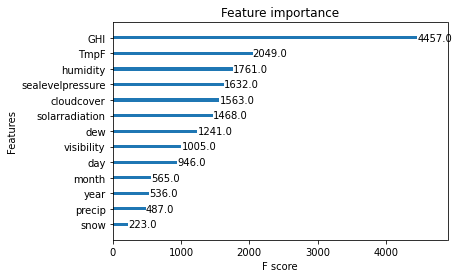

In [ ]:
# XGBoost models have feature importance built into the models themselves
xgb.plot_importance(xgb_model)
plt.grid(False)
plt.show()

## k-Cross Validation

In [ ]:
from sklearn.model_selection import KFold
import sklearn

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_model, xst_train, y_train, cv=10,scoring='r2')
scores

[05:18:39] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf" } are not used.

[05:18:49] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf" } are not used.

[05:18:59] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf" } are not used.

[05:19:13] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf" } are not used.

[05:19:23] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf" } are not used.

[05:19:31] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf" } are not used.

[05:19:41] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf" } are not used.

[05:19:51] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf" } are not used.

[05:20:02] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf" } are not used.

[05:20:18]

array([0.9613468 , 0.94811159, 0.90016585, 0.92104667, 0.99209155,
       0.95532039, 0.99302843, 0.97407956, 0.989823  , 0.98974508])

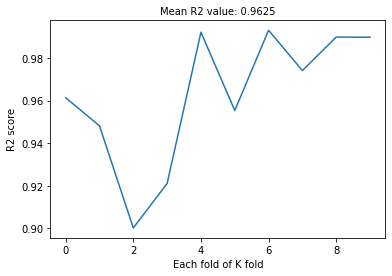

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1)
x = np.arange(10)
y = scores
ax.set_ylabel('R2 score')
ax.set_xlabel('Each fold of K fold')
ax.set_title('Mean R2 value: {:.4f}'.format(scores.mean()), fontsize=10)
ax.plot(x,y)